In [2]:
from scipy import signal
from matplotlib import pyplot, rcParams

%matplotlib nbagg

import numpy

rcParams.update({'font.family': "Source Sans Pro"})
rcParams.update({'font.size': 14})


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<IPython.core.display.Javascript object>


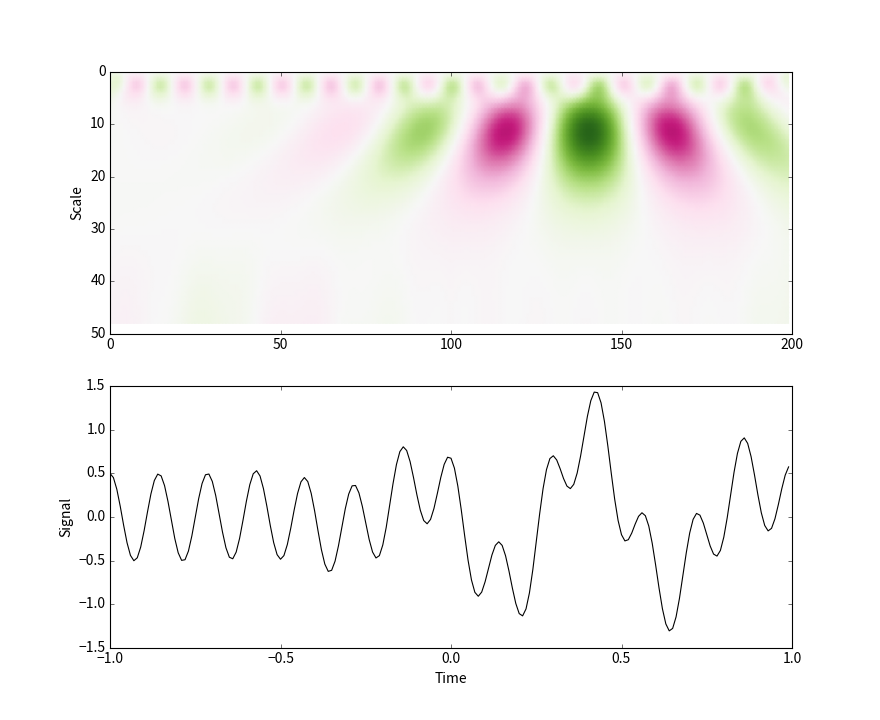

/usr/lib/python3.5/site-packages/scipy/signal/waveforms.py:236: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t == 'cutoff':  # compute cut_off point


In [52]:
fig, (ax1, ax2) = pyplot.subplots(2,1, figsize=(11,9))

t = numpy.linspace(-1, 1, 200, endpoint=False)
sig  = 0.5*numpy.cos(2 * numpy.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = numpy.arange(1,50)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
ax1.pcolormesh(cwtmatr, cmap='PiYG', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(), shading="gouraud")
ax1.invert_yaxis()
ax1.set_ylabel("Scale")

ax2.plot(t, sig, "k")
ax2.set_xlabel("Time")
ax2.set_ylabel("Signal")

pyplot.show()

In [3]:
data, error = numpy.loadtxt("../data/pole_drift/intensity.txt").T

In [4]:
t = numpy.arange(-12000, 1950, 50)

<IPython.core.display.Javascript object>


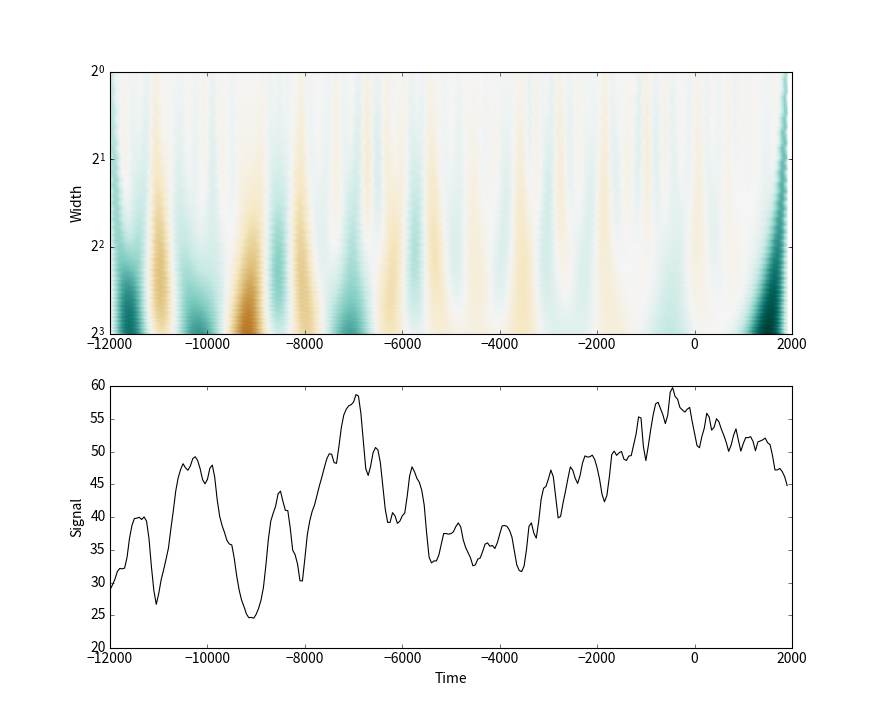

In [8]:
fig, (ax1, ax2) = pyplot.subplots(2,1, figsize=(11,9))

sig  = data
widths = numpy.linspace(1, 8, 128)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
cwtpower = cwtmatr*numpy.conjugate(cwtmatr)

ax1.pcolormesh(t, widths, cwtmatr,
               cmap='BrBG',
               vmax=abs(cwtmatr).max(),
               vmin=-abs(cwtmatr).max(),
               shading="gouraud")

ax1.invert_yaxis()
ax1.set_ylabel("Width")
ax1.set_yscale("log", basey=2)

ax2.plot(t, sig, "k")
ax2.set_xlabel("Time")
ax2.set_ylabel("Signal")

pyplot.show()